### Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not


In [1]:
#Importing reqd libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets  
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import classification_report

In [2]:
df= pd.read_csv('Fraud_check.csv')

In [3]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


### EDA

In [4]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
# Converting categorical variable into numerical variables.
df=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [7]:
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [8]:
taxable_amount = []
for value in df["Taxable.Income"]:
    if value<=30000:
        taxable_amount.append("risky")
    else:
        taxable_amount.append("good")
df["taxable_amount"]= taxable_amount

In [9]:
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,taxable_amount
0,68833,50047,10,0,0,1,1,good
1,33700,134075,18,1,0,0,1,good
2,36925,160205,30,0,1,0,1,good
3,50190,193264,15,1,0,1,1,good
4,81002,27533,28,0,1,0,0,good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,good
596,69967,55369,2,1,0,0,1,good
597,47334,154058,0,0,0,0,1,good
598,98592,180083,17,1,1,0,0,good


In [10]:
X = df.iloc[:,:-1]
Y = df['taxable_amount'] #Y is our target variable

In [11]:
df['taxable_amount'].value_counts()

good     476
risky    124
Name: taxable_amount, dtype: int64

In [12]:
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=42)

### Building Decision Tree Classifier using Entropy Criteria

In [13]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3) 
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

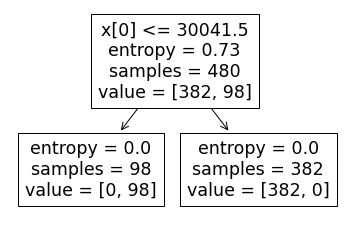

In [14]:
tree.plot_tree(model);

In [15]:
pred1 = model.predict(x_test)
print('Accuracy for test data:',np.mean(pred1==y_test))


Accuracy for test data: 1.0


In [16]:
pred2 = model.predict(x_train)
print('Accuracy for train data',np.mean(pred2==y_train))

Accuracy for train data 1.0


Text(0.5, 1.0, 'Decision tree using Entropy')

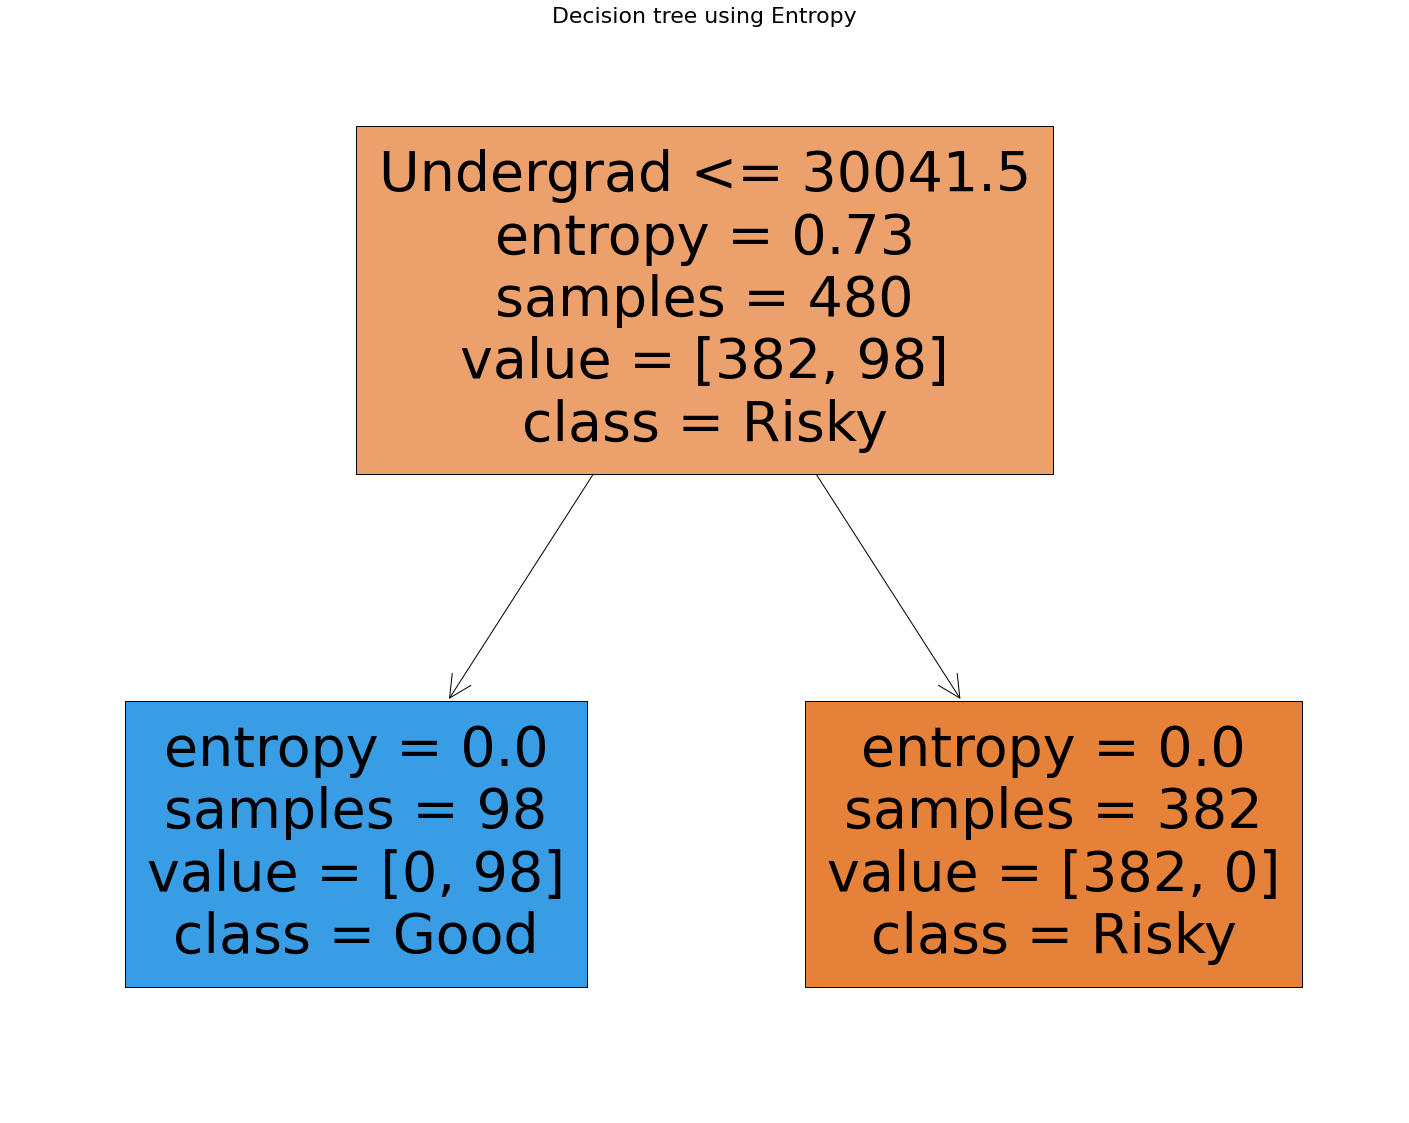

In [17]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model,
                     feature_names= ['Undergrad','Marital.Status','City.Population','Work.Experience'], 
                     class_names= ['Risky', 'Good'], filled=True)
plt.title('Decision tree using Entropy',fontsize=22)

#### Building Decision Tree Classifier (CART) using Gini Criteria

In [18]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [19]:
pred_test = model_gini.predict(x_test)

In [20]:
print('Test data Accuracy is:',np.mean(pred_test==y_test))

Test data Accuracy is: 1.0


In [21]:
pred_train = model_gini.predict(x_train)

In [22]:
print('Train data Accuracy is:',np.mean(pred_train==y_train))

Train data Accuracy is: 1.0


Text(0.5, 1.0, 'Decision tree using Gini')

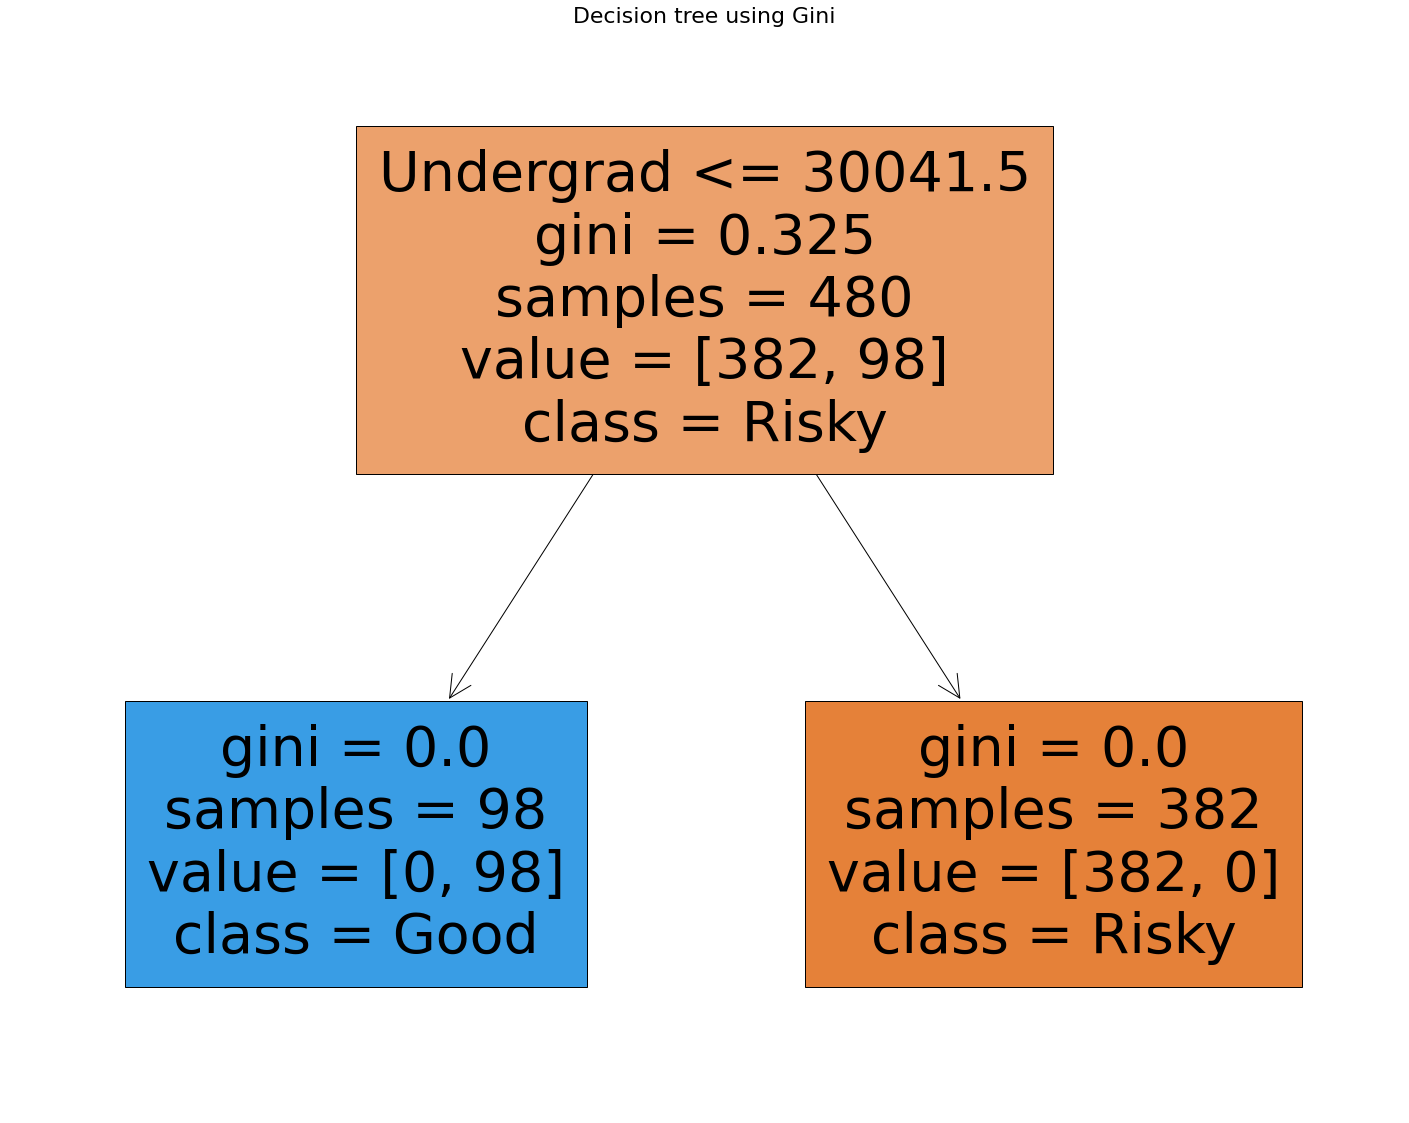

In [23]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model_gini,
                     feature_names= ['Undergrad','Marital.Status','City.Population','Work.Experience'], 
                                     class_names= ['Risky', 'Good'], filled=True)
plt.title('Decision tree using Gini',fontsize=22)